In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform
from numpy.random import normal
from numpy.random import triangular

In [2]:
N=10**6

# Términos de orden superior

Se tiene la función de medición del volumen de un paralelepípedo:

$$V(a,b,c)=abc$$

Los términos de orden superior se calculan siguiendo:

$$\sum_{i=1}^N\sum_{j=1}^N=\left[\frac{1}{2}\left[\frac{\partial^2f}{\partial x_i\partial x_j}\right]^2+\frac{\partial f}{\partial x_i}\frac{\partial^3f}{\partial x_i\partial x_j^2}\right]u^2(x_i)u^2(x_j)$$

De esta forma, la incertidumbre estándar estaría dada como:

$$u^2(V)=(bc)^2u^2(a)+(ac)^2u^2(b)+(ab)^2u^2(c)+\left[a^2u^2(b)u^2(b)u^2(c)+b^2u^2(a)u^2(c)+c^2u^2(a)u^2(b)\right]$$

Asumiendo que se tienen valores de

$$a=1\pm0.1;\quad b=2\pm0.1;\quad c=3\pm0.1$$

Se tendría que tomando en cuenta los términos de orden superior:

$$u(V)=0.4043375927$$

Y sin tomarlos en cuenta:

$$u(V)=0.4041451884$$

In [3]:
a=1+uniform(-0.1,0.1,size=N)
b=2+uniform(-0.1,0.1,size=N)
c=3+uniform(-0.1,0.1,size=N)

In [4]:
V=a*b*c

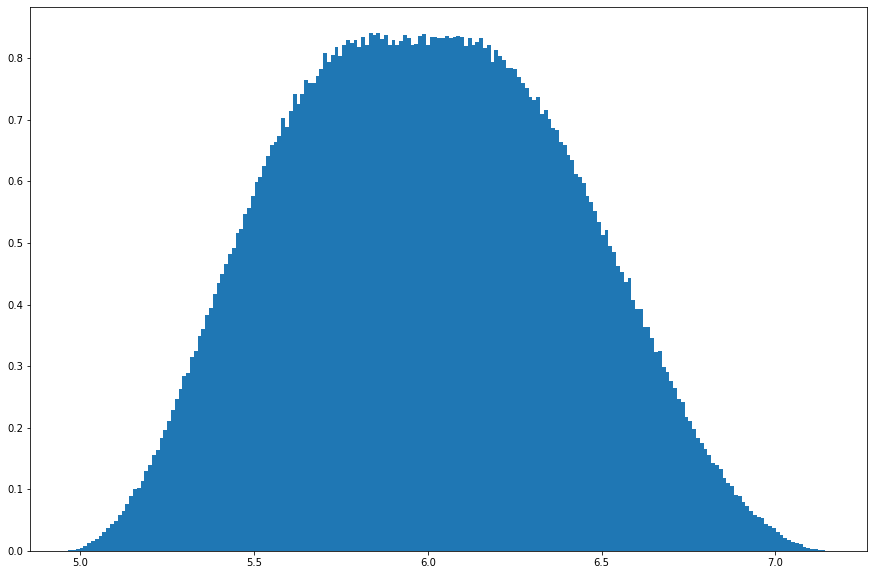

In [5]:
plt.figure(figsize=(15,10))
plt.hist(V,bins=200,density=True)
plt.show()

In [6]:
V.mean(),V.std()

(5.999391213088754, 0.40423016690312913)

# Error de coseno

Se desea medir la altura de una columna de mercurio, el ángulo de variación de la regla es de $\pm5°$ y varía de forma azimutal en dos dimensiones.

|Número de medición|Indicación de la regla (mm)|
|---|---|
|$1$|$664.0$|
|$2$|$665.5$|
|$3$|$665.0$|
|$4$|$664.5$|
|$5$|$665.0$|
|$6$|$665.5$|
|$7$|$664.5$|

Se deberán considerar incertidumbres por posicionamiento del cero y la resolución en el punto de medida. La primera es de $\pm0.25\textrm{ mm}$ con una distribución triangular y la resolución se toma de la división de escala. La regla es de acero, su coeficiente de expansión térmica es de $11\times10^{-6}$, la temperatura se mantiene en $(20\pm5)\textrm{ °C}$. La incertidumbre de calibración de la regla es de $\pm0.15\textrm{ mm}$ con un factor de cobertura de $1.96$ y la deriva entre calibraciones no es mayor que $\pm0.10\textrm{ mm}$.

El modelo a utilizar será:

$$L=L_0\left(1+\alpha\Delta T\right)$$

De donde la medición vendrá como:

$$L_0=\frac{L}{\left(1+\alpha\Delta T\right)}$$

In [7]:
regla=np.array([664.0,665.5,665.0,664.5,665.0,665.5,664.5])

In [8]:
r=regla.reshape((len(regla),1))+normal(0,0.15/1.96,size=(len(regla),N))+uniform(-0.1,0.1,size=(len(regla),N))+uniform(-0.1/2,0.1/2,size=(len(regla),N))+triangular(-0.25,0,0.25,size=(len(regla),N))
r=np.mean(r,axis=0)+normal(0,np.std(r,axis=0)/np.sqrt(len(r)),size=N)

In [9]:
t=uniform(-5,5,size=N)

In [10]:
rR=r/(1+11*10**-6*t)

In [11]:
plt.figure(figsize=(15,10))
plt.hist(rR,bins=200,density=True)
plt.show()

In [12]:
r.mean(),r.std()

(664.856990775283, 0.20788482097838615)